In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [121]:
pd.set_option('display.max_columns',None)
def ourInfo(data):
    df=data.copy(deep=True)
    x = []
    for col in df.columns : 
        x.append([col , df[col].unique() ,df[col].nunique(),df[col].dtype,df[col].isna().sum() ])

    info=pd.DataFrame(x ,columns=['Feature','Unique_Values','No.OfUniqueValues','DataType','NoOfNulls'])
    from IPython.display import display
    display(info)
    


In [122]:
pd.set_option('display.max_rows',10)

In [123]:
data=pd.read_csv('9961_14084_bundle_archive\Train.csv')
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


C:\Users\fadyamin\Documents\virtual_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


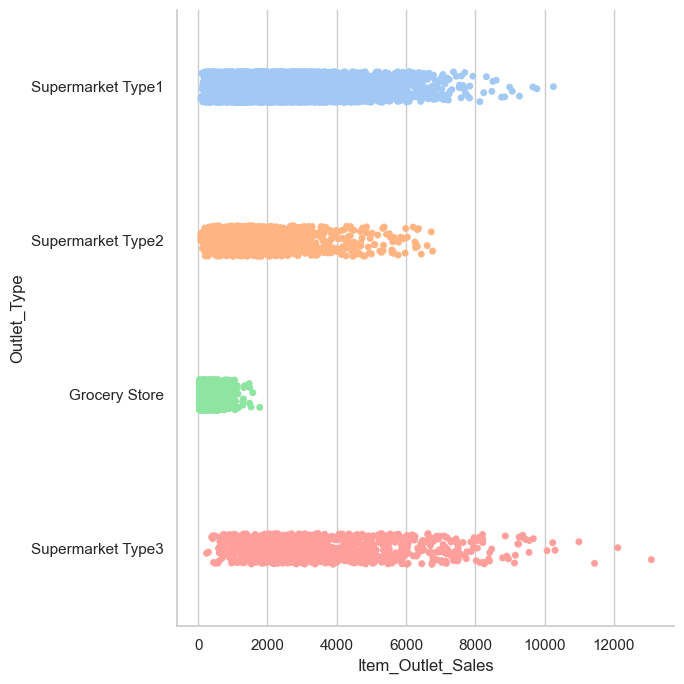

In [143]:
dataOT=data[['Outlet_Identifier','Outlet_Type','Outlet_Location_Type','Item_Outlet_Sales']]
sns.catplot(data=dataOT,x='Item_Outlet_Sales',y='Outlet_Type', legend_out=True,size=7)
#sns.catplot(data=dataOT,col=dataOT['Outlet_Type'],dataOT['Outlet_Location_Type'])

In [125]:
data[data['Outlet_Location_Type']=='Tier 3']['Item_Outlet_Sales'].describe()

count     3350.000000
mean      2279.627651
std       1912.451333
min         33.290000
25%        731.381300
50%       1812.307600
75%       3307.694400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [126]:
data[data['Outlet_Location_Type']=='Tier 2']['Item_Outlet_Sales'].describe()

count    2785.000000
mean     2323.990559
std      1520.543543
min        99.870000
25%      1171.808000
50%      2004.058000
75%      3110.617600
max      9664.752800
Name: Item_Outlet_Sales, dtype: float64

In [127]:
data[data['Outlet_Location_Type']=='Tier 1']['Item_Outlet_Sales'].describe()

count    2388.000000
mean     1876.909159
std      1561.649293
min        33.955800
25%       593.727150
50%      1487.397200
75%      2803.018000
max      9779.936200
Name: Item_Outlet_Sales, dtype: float64

In [128]:
outlet_list=data['Outlet_Identifier'].unique()
outlet_list

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [129]:
#data[data['Outlet_Identifier']==outlet_list]['Outlet_Size'].unique()

Temp_dict=data.set_index(data['Item_Identifier']).to_dict()['Item_Weight']


In [130]:
data[data['Item_Identifier']=='FDF22']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
406,FDF22,6.865,Low Fat,0.056919,Snack Foods,212.8218,OUT049,1999,Medium,Tier 1,Supermarket Type1,5770.4886
2077,FDF22,6.865,Low Fat,0.056831,Snack Foods,214.0218,OUT046,1997,Small,Tier 1,Supermarket Type1,5556.7668
3042,FDF22,6.865,Low Fat,0.056820,Snack Foods,212.6218,OUT035,2004,Small,Tier 2,Supermarket Type1,2137.2180
4852,FDF22,6.865,Low Fat,0.056946,Snack Foods,214.6218,OUT045,2002,NaN,Tier 2,Supermarket Type1,1923.4962
5877,FDF22,6.865,Low Fat,0.057152,Snack Foods,211.8218,OUT017,2007,NaN,Tier 2,Supermarket Type1,4915.6014
7906,FDF22,6.865,Low Fat,0.095123,Snack Foods,212.3218,OUT010,1998,NaN,Tier 3,Grocery Store,427.4436
8044,FDF22,6.865,Low Fat,0.057062,Snack Foods,212.0218,OUT018,2009,Medium,Tier 3,Supermarket Type2,2350.9398
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834


In [131]:
ourInfo(data)

,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls
0,Item_Identifier,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559,object,0
1,Item_Weight,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n...",415,float64,1463
2,Item_Fat_Content,"[Low Fat, Regular, low fat, LF, reg]",5,object,0
3,Item_Visibility,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880,float64,0
4,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16,object,0
...,...,...,...,...,...
7,Outlet_Establishment_Year,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9,int64,0
8,Outlet_Size,"[Medium, nan, High, Small]",3,object,2410
9,Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]",3,object,0
10,Outlet_Type,"[Supermarket Type1, Supermarket Type2, Grocery...",4,object,0


In [132]:
data1=data.dropna()
#Creating a dictionary of the True Weight Values for the items 
TWD=data1.set_index(data1['Item_Identifier']).to_dict()['Item_Weight']
#Creating a dictionary of the actual Outlet Size  values for each Outlet as per the Outlet ID
#TOS=data1.set_index(data1['Outlet_Identifier']).to_dict()['Outlet_Size']
#TOS

In [133]:
data[data['Outlet_Identifier']=='OUT010']['Outlet_Size'].nunique()

0

In [134]:
#Filling Null values in Item Weight & Outlet Size as per the corresponding values per each unique item & unique outlet ID 
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Identifier'].map(TWD))
#data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Identifier'].map(TWD))


In [138]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [136]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
data['Outlet_Location_Type']=LE.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Location_Type']

0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 8523, dtype: int32

In [ ]:
data['Outlet_Identifier'].unique()

In [21]:
data[data['Outlet_Identifier']=='OUT017']['Outlet_Size'].nunique()

0

In [110]:
ourInfo(data)

,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls
0,Item_Identifier,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559,object,0
1,Item_Weight,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, 1...",415,float64,23
2,Item_Fat_Content,"[Low Fat, Regular, low fat, LF, reg]",5,object,0
3,Item_Visibility,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880,float64,0
4,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16,object,0
...,...,...,...,...,...
7,Outlet_Establishment_Year,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9,int64,0
8,Outlet_Size,"[Medium, nan, High, Small]",3,object,2410
9,Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]",3,object,0
10,Outlet_Type,"[Supermarket Type1, Supermarket Type2, Grocery...",4,object,0


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.008699,0.025710,-0.015184,0.012760
Item_Visibility,-0.008699,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025710,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.015184,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.012760,-0.128625,0.567574,-0.049135,1.000000


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [105]:
X=data.drop(['Item_Outlet_Sales','Outlet_Size'],axis=1)
y=data[['Item_Outlet_Sales']]


In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
#y.reshape(-1,1)
#X_train=sd.fit_transform(X_train)
#X_test=sd.fit_transform(X_test)
X=sd.fit_transform(X)
y=sd.fit_transform(y)

ValueError: could not convert string to float: 'FDA15'

In [ ]:
model=LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
model.score(X_train,y_train)

# Model

In [ ]:
rom sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
vanilla_model=data.copy(deep=True)
test_model=data.copy(deep=True)

In [ ]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
test_model['Outlet_Size','Outlet_Location_Type']=LE

In [ ]:
X=vanilla_model['Item_Outlet_Sales']
y=vanilla_model.drop(['Item_Outlet_Sales'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
#here we established that outlet 27 has the highest sales and outlet 10 has the least sales 


# Null Handling

In [ ]:
ourInfo(data)

# Vanilla Model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [26]:
vanilla_model=data.copy(deep=True)
test_model=data.copy(deep=True)

In [147]:
vanilla_model.drop(['Item_Identifier','Outlet_Size'],axis=1,inplace=True)


KeyError: "['Item_Identifier', 'Outlet_Size'] not found in axis"

In [150]:
vanilla_model['Item_Weight']=data['Item_Weight']
ourInfo(vanilla_model)

,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls
0,Item_Weight,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, 1...",415,float64,23
1,Item_Fat_Content,"[Low Fat, Regular, low fat, LF, reg]",5,object,0
2,Item_Visibility,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880,float64,0
3,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16,object,0
4,Item_MRP,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,...",5938,float64,0
5,Outlet_Identifier,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10,object,0
6,Outlet_Establishment_Year,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9,int64,0
7,Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]",3,object,0
8,Outlet_Type,"[Supermarket Type1, Supermarket Type2, Grocery...",4,object,0
9,Item_Outlet_Sales,"[3735.138, 443.4228, 2097.27, 732.38, 994.7052...",3493,float64,0


In [151]:
vanilla_model=pd.get_dummies(data=vanilla_model)

In [152]:
ourInfo(vanilla_model)

,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls
0,Item_Weight,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, 1...",415,float64,23
1,Item_Visibility,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880,float64,0
2,Item_MRP,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,...",5938,float64,0
3,Outlet_Establishment_Year,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9,int64,0
4,Item_Outlet_Sales,"[3735.138, 443.4228, 2097.27, 732.38, 994.7052...",3493,float64,0
...,...,...,...,...,...
38,Outlet_Location_Type_Tier 3,"[0, 1]",2,uint8,0
39,Outlet_Type_Grocery Store,"[0, 1]",2,uint8,0
40,Outlet_Type_Supermarket Type1,"[1, 0]",2,uint8,0
41,Outlet_Type_Supermarket Type2,"[0, 1]",2,uint8,0


In [ ]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
test_model['Outlet_Size','Outlet_Location_Type']=LE

In [155]:
y=vanilla_model['Item_Outlet_Sales']
X=vanilla_model.drop(['Item_Outlet_Sales'],axis=1)

In [156]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [169]:
y=np.array(y)
y.reshape(-1,1)

array([[3735.138 ],
       [ 443.4228],
       [2097.27  ],
       ...,
       [1193.1136],
       [1845.5976],
       [ 765.67  ]])

In [170]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
#y.reshape(-1,1)
#X_train=sd.fit_transform(X_train)
#X_test=sd.fit_transform(X_test)
X=sd.fit_transform(X)
y=sd.fit_transform(y)

ValueError: Expected 2D array, got 1D array instead:
array=[3735.138   443.4228 2097.27   ... 1193.1136 1845.5976  765.67  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [29]:
class PreProcessing():
    def _init_(self, df : pd.DataFrame = pd.DataFrame) :
        self.df = df
        
    
    def Information (self , df) :
        self.df = df
        df.replace('?' , np.nan , inplace = True )
        nulls = (df.shape[0] - df.dropna(axis = 0).shape[0])
        nulls_per = (df.shape[0] - df.dropna(axis = 0).shape[0]) / df.shape[0]
        dup , dup_per = df.duplicated().sum() , (df.duplicated().sum()) / df.shape[0]
        numerical_columns = list((df.select_dtypes(include=np.number)).columns)
        categorical_columns = list(df.select_dtypes(include = ['object']).columns)
        numerical_col_dict = {}
        for col in numerical_columns :
            if df[col].nunique() > 10 :
                numerical_col_dict[col] = 'Continuous' 

            else :
                numerical_col_dict[col] = 'Discrete'
        categorical_col_dict = {}
        for col in categorical_columns :
            if df[col].nunique() > 10 :
                categorical_col_dict[col] = 'Continuous' 

            else :
                categorical_col_dict[col] = 'Classes'
        x = []
        for col in df.columns : 
            x.append([col , df[col].unique() ,df[col].nunique(),df[col].dtype,df[col].isna().sum(),int((df[col].isna().sum())/df.shape[0] * 100)  ])

        x = pd.DataFrame(x ,columns=['Feature','Unique_Values','No.OfUniqueValues','DataType','NoOfNulls','Nulls %'])
        
        print('\n','There is : {}  Nulls, Representing {} % of The Data'.format(nulls , '%.2f'%nulls_per ))
        print('\n','There is : {}  Duplicated, Representing {} % of The Data'.format(dup , '%.2f'%dup_per))
        print('\n','Numerical Columns : {}'.format(numerical_col_dict))
        print('\n','Categorical Columns : {}'.format(categorical_col_dict))
        
        return x
    
    def ImputeNulls(self , df , col_method : dict = {} , type_method : dict = {}) :
        self.df = df
        self.col_method = col_method
        self.type_method = type_method
        df = df.drop_duplicates()
        if len(col_method) == 0 & len(type_method) == 0  : 
            numerical_columns = list((df.select_dtypes(include=np.number)).columns)
            categorical_columns = list(df.select_dtypes(include = ['object']).columns)

            for col in numerical_columns :
                df[col] = df[col].interpolate()
                
            df[categorical_columns] = df[categorical_columns].apply(lambda x:x.fillna(x.value_counts().index[0]))

                
        elif len(col_method) != 0 :
            for col in col_method.keys() :
                df[col] = df[col].fillna(method = col_method[col])
                
        elif len(type_method) != 0 :
            numerical_columns = list((df.select_dtypes(include=np.number)).columns)
            categorical_columns = list(df.select_dtypes(include = ['object']).columns)
            for col in numerical_columns :
                df[col] = df[col].fillna(method = type_method['int'])
                
            for col in categorical_columns :
                df[col] = df[col].fillna(method = type_method['object'])
                
        return df
    
    
    def Oultiers(self , df , display = False , drop = False , drop_order = 1 ,columns_to_display = [], columns_to_drop = []) :
        self.df = df
        self.display = display
        self.drop = drop
        self.drop_order = drop_order
        self.columns_to_display = columns_to_display
        self.columns_to_drop = columns_to_drop
        numerical_columns = list((df.select_dtypes(include=np.number)).columns)


        if display == True :
            if (len(columns_to_display) != 0) :
                numerical_columns = columns_to_display
            from math import ceil
            x = ceil(len(numerical_columns)/2)
            if len(numerical_columns) >= 6 :
                fig = plt.figure(figsize=(25, 30))
            else : 
                fig = plt.figure(figsize=(25, 30))

            fig.subplots_adjust(hspace=0.5)
            sns.set_theme(style="whitegrid", palette="pastel")
            fig.subplots_adjust(hspace=0.5)
            subfigs = fig.subfigures(len(numerical_columns), 1)
            for idx , i in enumerate(numerical_columns) :
                (ax1, ax2) = subfigs[idx].subplots(1, 2)
                sns.boxplot(x = df[i] ,data = df , ax = ax1)
                sns.histplot(x = df[i], kde=True , ax = ax2)
                subfigs[idx].subplots_adjust(bottom=0.25, right=0.8, top=0.75)

        if drop == True :
            if (len(columns_to_drop) != 0) :
                numerical_columns = columns_to_drop
            elif drop_order < 1 :
                drop_order = 1

            import scipy.stats as stats

            while drop_order != 0 :
                for col in  numerical_columns :
                    p_value = stats.normaltest(df[col])
                    if p_value[1] >= .05 :                                      ## col is normally distributed
                        filt = (df[col]-df[col].mean())/df[col].std()
                        indexes = (filt[filt > 3]).index
                        df.drop(indexes , inplace = True )
                        df.reset_index(drop=True , inplace=True)

                    else :                                                     ## col is Skewed 

                        q1 = df[col].quantile(0.25)
                        q3 = df[col].quantile(0.75)
                        iqr = q3 - q1
                        lower = q1 - 1.5*iqr
                        if lower < 0 :
                            lower = 0
                        higher = q3 + 1.5*iqr
                        df = df [df[col] >= lower] 
                        df = df [df[col] <= higher ]
                        df.reset_index(drop=True , inplace=True)

                drop_order = drop_order - 1


        return df
       
        
    def ChangeDatatype(self , df , one_hot = False , labeling = False ,defult = True ) :
        self.df = df 
        self.one_hot = one_hot
        self.labeling = labeling
        
        
        if defult == True :
            categorical_columns = list(df.select_dtypes(include = ['object']).columns)
            one_hot_encoding = []
            from sklearn import preprocessing
            label_encoder = preprocessing.LabelEncoder()
            for col in categorical_columns :
                if df[col].nunique() < 20 :
                    one_hot_encoding.append(col)
                    
                else :
                    df[col]= label_encoder.fit_transform(df[col])
                    
            df = pd.get_dummies(df , drop_first=True)
                    
                
                    
        
        elif one_hot == True :
            df = pd.get_dummies(df , drop_first=True)
            
        elif labeling == True :
            from sklearn import preprocessing
            label_encoder = preprocessing.LabelEncoder()
            for col in df.columns :
                df[col]= label_encoder.fit_transform(df[col])
                
                
        return df
    
    
    def Model (self , df , model ,target_name , problem ,test_size = 0.3 , random_state = 42 ) :
        self.df = df
        self.model = model
        self.target_name = target_name
        self.problem = problem
        self.test_size = test_size
        self.random_state = random_state
        
        
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score ,classification_report, r2_score
        x = df.drop([target_name] , axis = 1)
        y = df[target_name]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = random_state)
        
        list_of_models = [model]
        if problem == 'Classification' :
            classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])
            for model in list_of_models :
                model = model
                model.fit(x_train , y_train)
                for i in range(2) :

                    if i == 0 :
                        to_pred = x_train
                        pred = y_train
                        title = 'Train'

                    else :
                        to_pred = x_test
                        pred = y_test
                        title = 'Test'
                    y_pred = model.predict(to_pred)
                    acc = round(accuracy_score(pred , y_pred)*100)
                    f1 = round(f1_score(pred , y_pred)*100)
                    prec = round(precision_score(pred , y_pred)*100)
                    recall = round(recall_score(pred , y_pred)*100)
                    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                                 , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
                    classification_report = pd.concat([classification_report , d])
                    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )
                    
        elif problem == 'Regression' :
            classification_report = pd.DataFrame(columns=['Score'])
            for model in list_of_models :
                model = model
                model.fit(x_train , y_train)
                for i in range(2) :

                    if i == 0 :
                        to_pred = x_train
                        pred = y_train
                        title = 'Train'

                    else :
                        to_pred = x_test
                        pred = y_test
                        title = 'Test'
                    y_pred = model.predict(to_pred)
                    acc = round(r2_score(pred , y_pred)*100)
                    d = pd.DataFrame(data=np.array([acc]).reshape(1,1) 
                                 , columns=['Score'])  
                    classification_report = pd.concat([classification_report , d])
                    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )
                    
        print(classification_report)
        return model

In [28]:
df = pd.read_csv('9961_14084_bundle_archive\Train.csv')

In [30]:
pre = PreProcessing()
pre.Information(df)


 There is : 3873  Nulls, Representing 0.45 % of The Data

 There is : 0  Duplicated, Representing 0.00 % of The Data

 Numerical Columns : {'Item_Weight': 'Continuous', 'Item_Visibility': 'Continuous', 'Item_MRP': 'Continuous', 'Outlet_Establishment_Year': 'Discrete', 'Item_Outlet_Sales': 'Continuous'}

 Categorical Columns : {'Item_Identifier': 'Continuous', 'Item_Fat_Content': 'Classes', 'Item_Type': 'Continuous', 'Outlet_Identifier': 'Classes', 'Outlet_Size': 'Classes', 'Outlet_Location_Type': 'Classes', 'Outlet_Type': 'Classes'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,Item_Identifier,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559,object,0,0
1,Item_Weight,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n...",415,float64,1463,17
2,Item_Fat_Content,"[Low Fat, Regular, low fat, LF, reg]",5,object,0,0
3,Item_Visibility,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880,float64,0,0
4,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16,object,0,0
5,Item_MRP,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,...",5938,float64,0,0
6,Outlet_Identifier,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10,object,0,0
7,Outlet_Establishment_Year,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9,int64,0,0
8,Outlet_Size,"[Medium, nan, High, Small]",3,object,2410,28
9,Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]",3,object,0,0


In [31]:
df = pre.ImputeNulls(df)

In [32]:
pre.Information(df)


 There is : 0  Nulls, Representing 0.00 % of The Data

 There is : 0  Duplicated, Representing 0.00 % of The Data

 Numerical Columns : {'Item_Weight': 'Continuous', 'Item_Visibility': 'Continuous', 'Item_MRP': 'Continuous', 'Outlet_Establishment_Year': 'Discrete', 'Item_Outlet_Sales': 'Continuous'}

 Categorical Columns : {'Item_Identifier': 'Continuous', 'Item_Fat_Content': 'Classes', 'Item_Type': 'Continuous', 'Outlet_Identifier': 'Classes', 'Outlet_Size': 'Classes', 'Outlet_Location_Type': 'Classes', 'Outlet_Type': 'Classes'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,Item_Identifier,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559,object,0,0
1,Item_Weight,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, 1...",1443,float64,0,0
2,Item_Fat_Content,"[Low Fat, Regular, low fat, LF, reg]",5,object,0,0
3,Item_Visibility,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880,float64,0,0
4,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16,object,0,0
5,Item_MRP,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,...",5938,float64,0,0
6,Outlet_Identifier,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10,object,0,0
7,Outlet_Establishment_Year,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9,int64,0,0
8,Outlet_Size,"[Medium, High, Small]",3,object,0,0
9,Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]",3,object,0,0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


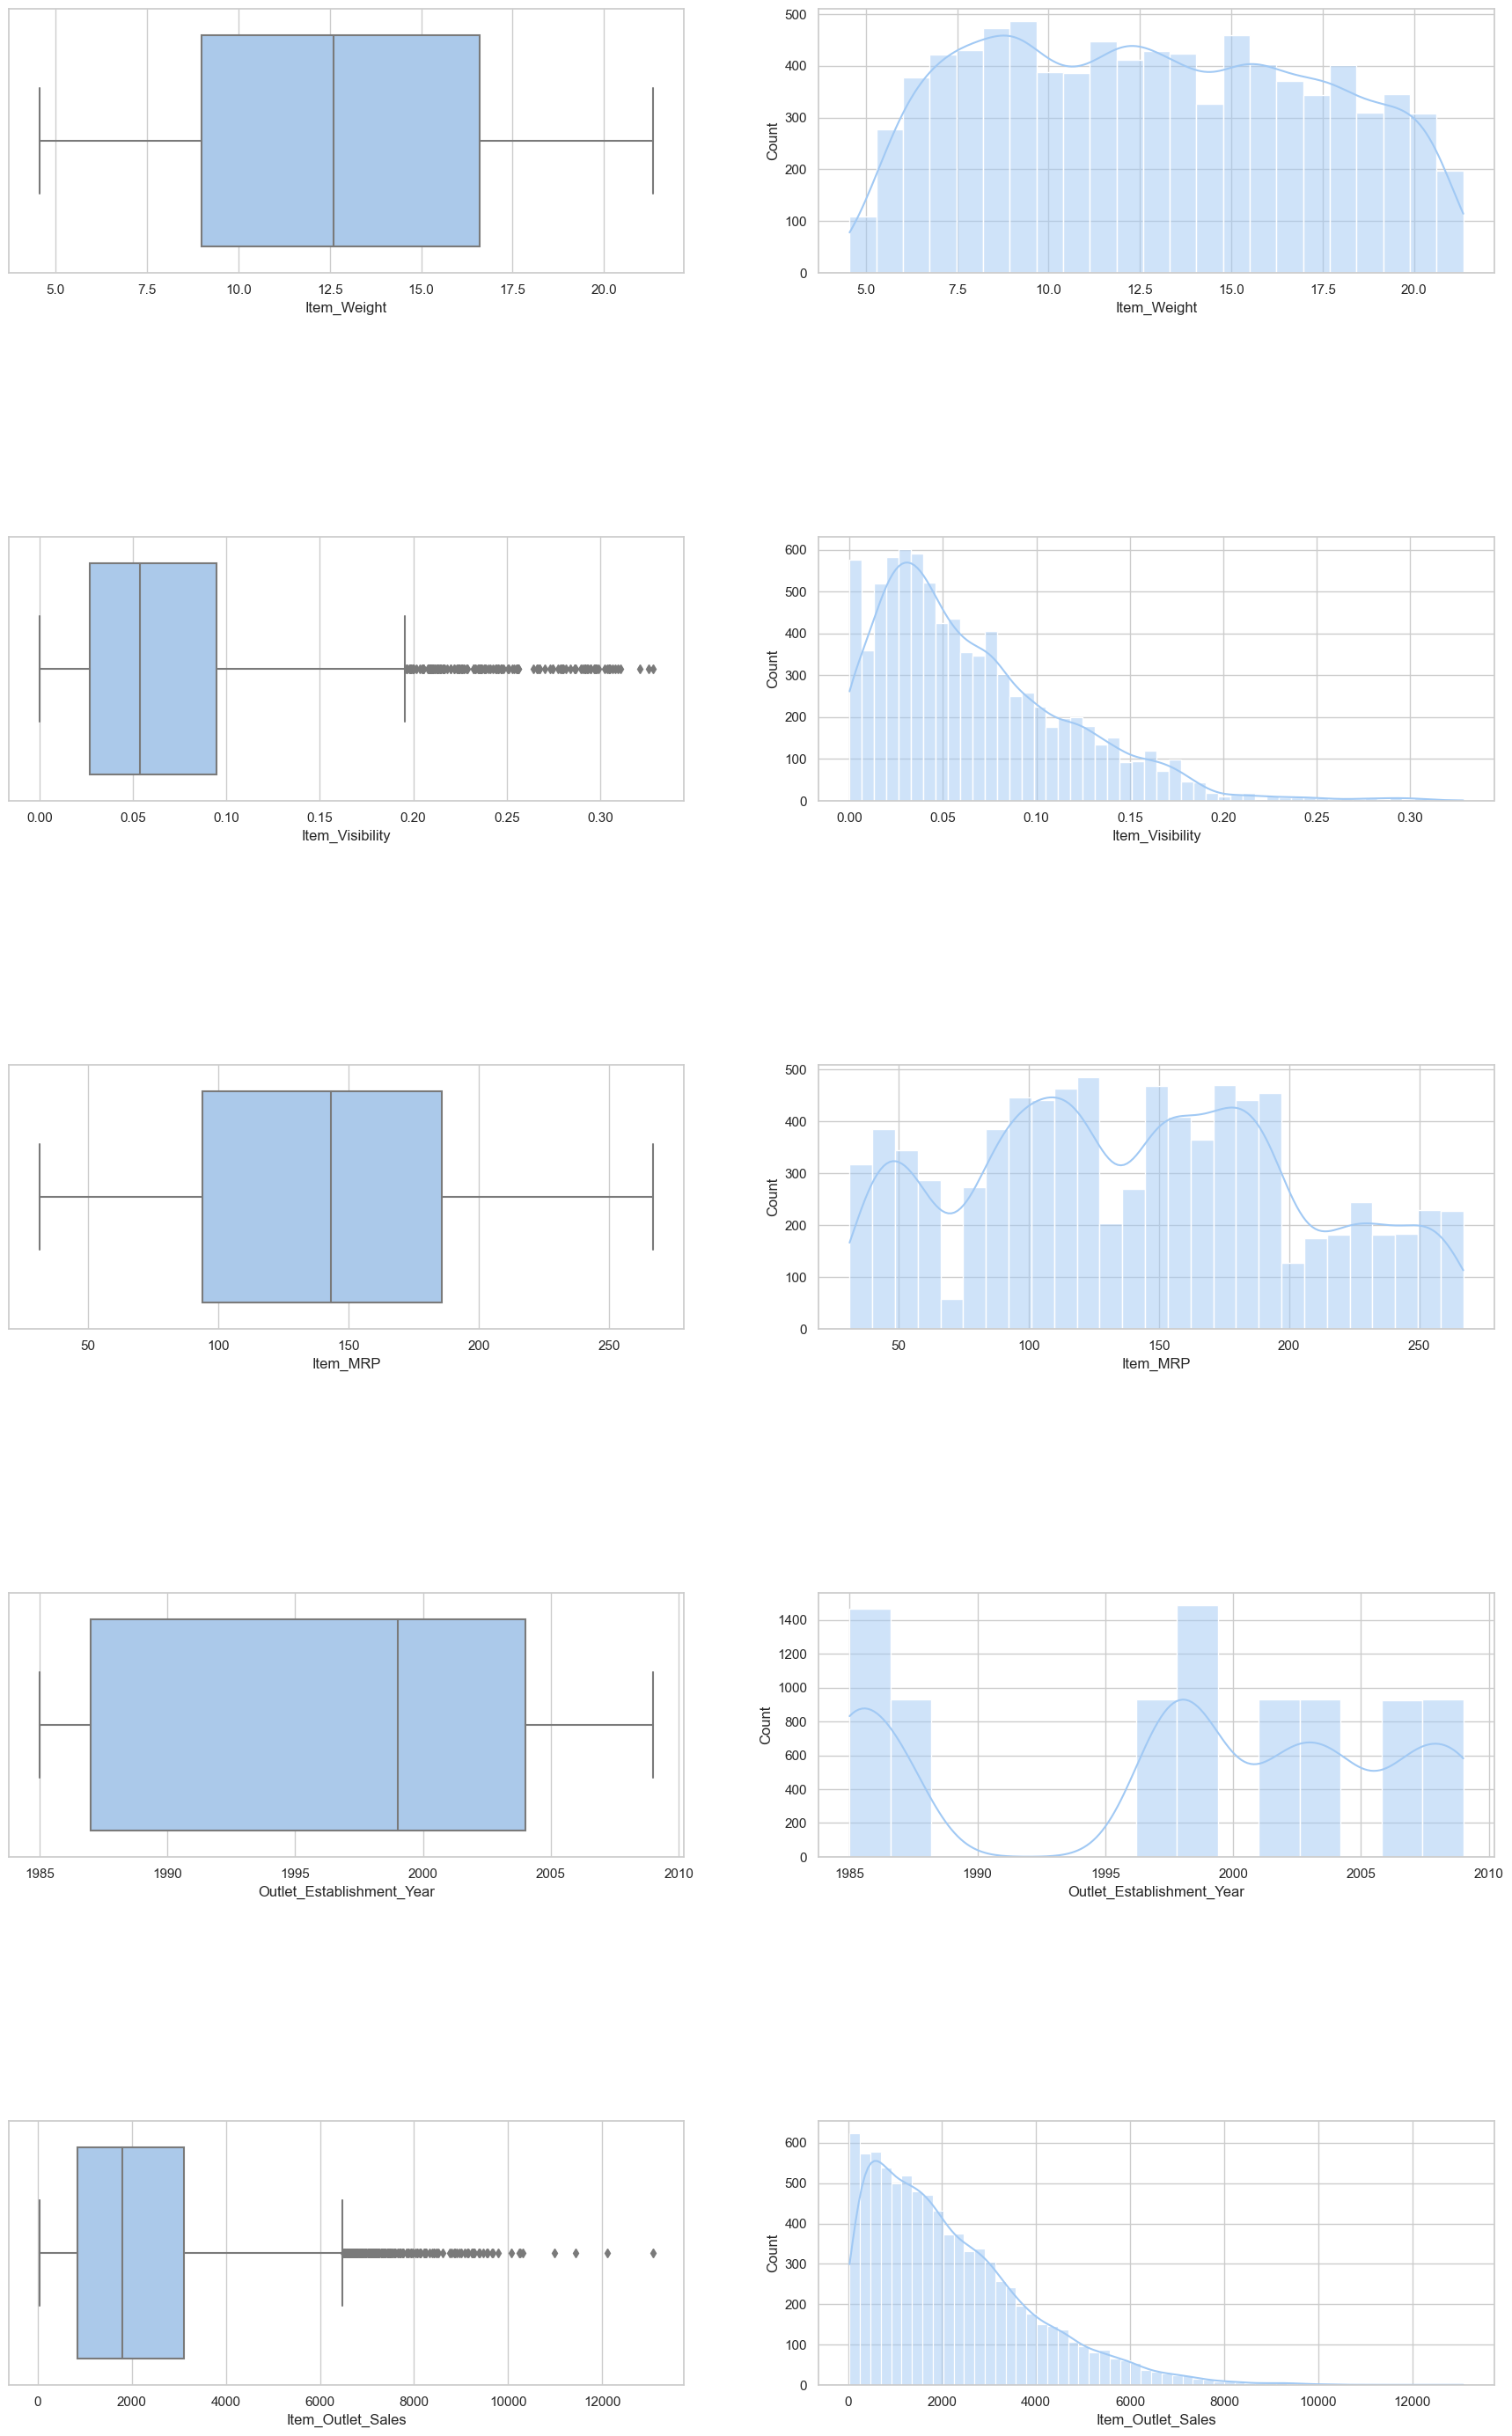

In [33]:
pd.set_option('display.max_rows',10)
pre.Oultiers(df , display=True)

In [34]:
df = pre.ChangeDatatype(df)

In [40]:
from sklearn.ensemble import RandomForestRegressor
model = pre.Model(df , model = RandomForestRegressor(n_jobs = -1,max_depth=6 , min_samples_split=3 , min_samples_leaf=5) , target_name='Item_Outlet_Sales',problem='Regression')

                                                   Score
RandomForestRegressor(max_depth=6, min_samples_...    64
RandomForestRegressor(max_depth=6, min_samples_...    60


In [ ]:
df